<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PSS_score          3000 non-null   int64  
 1   sleep_duration     3000 non-null   float64
 2   screen_on_time     3000 non-null   float64
 3   mobility_radius    3000 non-null   float64
 4   mobility_distance  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB
None


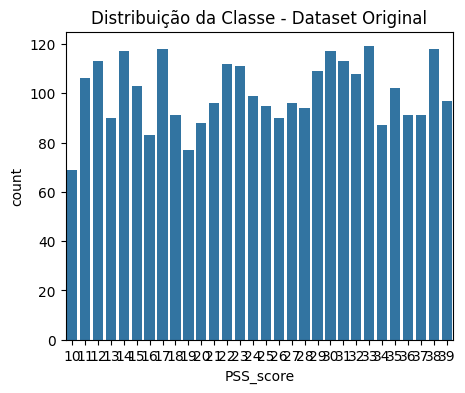

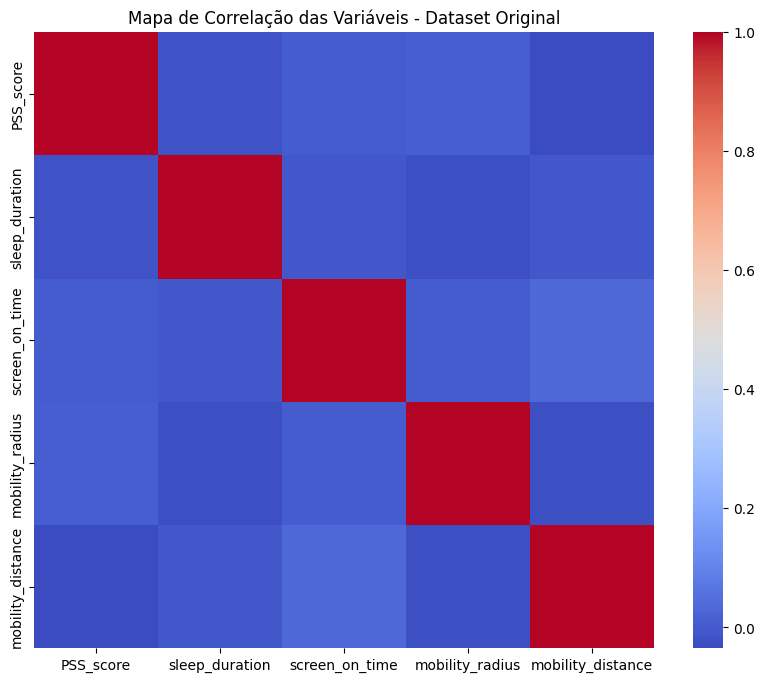

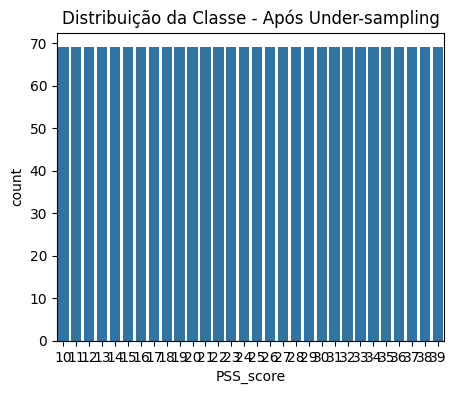

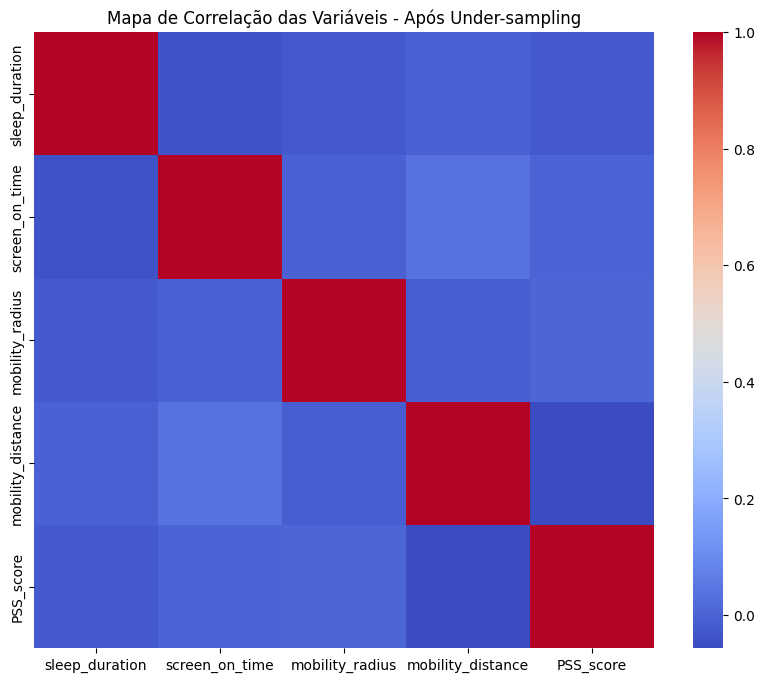

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para Under-sampling
Matriz de Confusão:
[[ 0  0  0  0  0  0  4  0  0  2  0  0  0  0  0  1  0  1  4  0  0  0  0  0
   0  0  0  6  0  0]
 [ 1  0  2  0  0  0  0  1  0  1  0  0  1  0  0  3  0  0  6  0  0  0  0  0
   0  1  0  4  0  0]
 [ 2  0  0  0  0  1  0  1  0  3  0  0  0  0  0  0  0  2  4  0  0  0  0  0
   0  2  0  2  0  0]
 [ 0  2  1  0  0  4  1  0  0  2  0  0  2  0  0  4  0  0  5  0  0  0  0  0
   0  1  0  5  0  0]
 [ 2  2  0  0  0  2  3  0  0  1  0  0  1  0  0  3  0  1  3  0  0  0  0  0
   0  1  0  5  0  0]
 [ 2  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  8  0  1  0  0  0
   0  1  0  7  0  0]
 [ 3  0  0  0  0  4  1  1  0  2  0  0  2  0  0  2  0  1  3  0  0  0  0  0
   0  2  0  4  0  0]
 [ 0  1  0  0  0  1  1  0  0  4  0  0  0  0  0  4  0  2  5  0  0  0  0  0
   0  1  0  2  0  0]
 [ 0  0  0  0  0  2  3  0  0  2  0  0  1  0  0  6  0  0  6  0  2  0  0  0
   0  4  0  5  0  0]
 [ 0  0  1  0  0  0  3  0  0  1  0  0  0  0  0  0  0  0  2  0  1  0  0  0
   0  0  0  2  0  0]


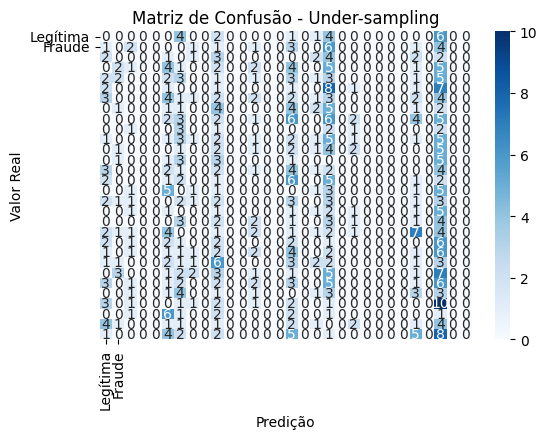

Relatório de Classificação:
              precision    recall  f1-score   support

          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        24
          15       0.02      0.05      0.03        22
          16       0.02      0.04      0.03        25
          17       0.00      0.00      0.00        21
          18       0.00      0.00      0.00        31
          19       0.02      0.10      0.03        10
          20       0.00      0.00      0.00        24
          21       0.00      0.00      0.00        19
          22       0.00      0.00      0.00        14
          23       0.00      0.00      0.00        20
          24       0.00      0.00      0.00        20
          25       0.00      0.00      0.00        18
          26       0.00      0.00      0.00        19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Função para visualização de distribuição de classes e correlação
def plot_class_distribution_and_correlation(data, title):
    plt.figure(figsize=(5, 4))
    sns.countplot(x='PSS_score', data=data)
    plt.title(f'Distribuição da Classe - {title}')
    plt.show()

    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, cmap="coolwarm", annot=False, fmt='.2f')
    plt.title(f"Mapa de Correlação das Variáveis - {title}")
    plt.show()

# Função para comparar os efeitos do balanceamento e gerar um gráfico comparativo
def compare_balancing_effects(X, y):
    results = {}

    # Under-sampling
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    data_resampled_rus = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_rus['PSS_score'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_rus, "Após Under-sampling")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Under-sampling")
    results["Under-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Over-sampling
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    data_resampled_ros = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_ros['Class'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_ros, "Após Over-sampling")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Over-sampling")
    results["Over-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    data_resampled_smote = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_smote['PSS_score'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_smote, "Após SMOTE")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "SMOTE")
    results["SMOTE"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Exibir resultados comparativos e identificar o melhor método
    print("\nResultados Comparativos de Balanceamento:")
    for method, metrics in results.items():
        print(f"{method}: AUC-ROC = {metrics['AUC-ROC']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

    # Identificar o método com melhor AUC-ROC e, em caso de empate, com maior F1-score da classe minoritária
    best_method = max(results, key=lambda x: (results[x]["AUC-ROC"], results[x]["F1-score Minor Class"]))
    print(f"\nMelhor método de balanceamento: {best_method} com AUC-ROC = {results[best_method]['AUC-ROC']:.4f} e F1-score Minor Class = {results[best_method]['F1-score Minor Class']:.4f}")

    # Gráfico Comparativo dos Resultados
    methods = list(results.keys())
    auc_scores = [results[method]["AUC-ROC"] for method in methods]
    f1_scores = [results[method]["F1-score Minor Class"] for method in methods]

    plt.figure(figsize=(10, 6))
    x = range(len(methods))
    plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
    plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
    plt.xticks(x, methods)
    plt.xlabel("Método de Balanceamento")
    plt.ylabel("Pontuação")
    plt.title("Comparação dos Métodos de Balanceamento (AUC-ROC e F1-score)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
    plt.tight_layout()  # Ajustar o layout para evitar cortes
    plt.show()

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X, y, balance_method):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {balance_method}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítima", "Fraude"], yticklabels=["Legítima", "Fraude"])
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {balance_method}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print("AUC-ROC:", roc_auc)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {balance_method}")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas para comparação
    f1_minor_class = report["1"]["f1-score"]
    return roc_auc, f1_minor_class

# Carregar dados e verificar distribuição original
data = pd.read_csv("stress_detection.csv")

# Drop de colunas
data = data.drop('participant_id', axis=1)
data = data.drop('day', axis=1)
data = data.drop('PSQI_score', axis=1)
# Personalidades
data = data.drop('Openness', axis=1)
data = data.drop('Conscientiousness', axis=1)
data = data.drop('Extraversion', axis=1)
data = data.drop('Agreeableness', axis=1)
data = data.drop('Neuroticism', axis=1)
# Sleep
data = data.drop('sleep_time', axis=1)
data = data.drop('wake_time', axis=1)
# Calls
data = data.drop('call_duration', axis=1)
data = data.drop('num_calls', axis=1)
data = data.drop('num_sms', axis=1)

print(data.info())

plot_class_distribution_and_correlation(data, "Dataset Original")

# Preparar variáveis independentes e dependentes
X = data.drop('PSS_score', axis=1)
y = data['PSS_score']

# Comparar os efeitos dos métodos de balanceamento
compare_balancing_effects(X, y)